# Успешные платежи

Имеются данные по платежам за 14 дней.

Результат исследования позволит улучшить конверсию платежей (повысить % успешных платежей).

**Цель исследования** -- провести исследовательский и статистический анализ данных:
  1. Выяснить, почему % успешных платежей маленький.
  2. Предложить варианты, как увеличить прохождение платежей.
    
**Исследование пройдёт в три этапа:**
 1. Обзор данных;
 2. Предобработка данных;
 3. Исследовательский анализ данных.

## Обзор данных

Составим первое представление о данных по платежам.

**1. Импортируем библиотеку pandas и другие. Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`.**

In [1]:
# обновим библиотеку 'pandas' до последней версии
#!pip install --upgrade pandas

# обновим библиотеку 'matplotlib' до последней версии
#!pip install --upgrade matplotlib

In [2]:
# импортируем библиотеку 'pandas'
import pandas as pd

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import matplotlib.pyplot as plt

In [3]:
try:
    # читаем данные из csv-файла и сохраняем их в виде датафрейма в 'df'
    df = pd.read_csv('datasets/dataset.csv', engine='pyarrow', encoding='utf-8')
except:
    print('File not found.')

**2. Выведем первые пять строчек датафрейма `df` на экран.**

In [4]:
# посмотрим первых пять строк датафрейма 'df'
df.head()

,date,orderId,campaignId,payment service provider,customerId,country,billCycle,recycleNumber,merchantId,merchantName,...,custom1,custom2,custom3,product1 name,product1 id,product1 qty,product1 price,product1 discount,transactionId,cardExpiryDate
0,2024-01-14 15:54:02,172A890908,9.0,Fib,47106.0,FR,5.0,0.0,7.0,Fib 1,...,177640.0,652454f90e8b980001db93d2,38,(3) Membership Plan 1,3.0,1.0,38.90,0.0,232406.0,2024-05-31 23:59:59
1,2024-01-14 3:11:21,C65958422F,9.0,Fib,44989.0,IT,7.0,2.0,5.0,Fib 2,...,173928.0,651732f055c3260001fbb370,38,(3) Membership Plan 2,3.0,1.0,18.67,0.0,232405.0,2028-02-29 23:59:59
2,2024-01-14 3:11:17,19A10E01DE,9.0,Fib,8945.0,IT,25.0,0.0,3.0,Fib 3,...,111821.0,63f24f7d8d162a000122e849,38,(3) Membership Plan 3,3.0,1.0,38.90,0.0,232404.0,2025-06-30 23:59:59
3,2024-01-14 3:11:13,12E232AFCE,9.0,Fib,11305.0,FR,17.0,0.0,4.0,Fib 4,...,116412.0,6413404cfd24f70001bd20ba,38,(3) Membership Plan,3.0,1.0,58.35,0.0,232403.0,2026-01-31 23:59:59
4,2024-01-14 3:11:09,61753A4E11,9.0,Fib,33583.0,PT,9.0,3.0,5.0,Fib 2,...,154776.0,64f9e28c4579870001af9abd,38,(3) Membership Plan 2,3.0,1.0,9.34,0.0,232402.0,2027-07-31 23:59:59


**3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype        
---  ------                    --------------  -----        
 0   date                      1202 non-null   object       
 1   orderId                   1202 non-null   object       
 2   campaignId                1201 non-null   float64      
 3   payment service provider  1202 non-null   object       
 4   customerId                1201 non-null   float64      
 5   country                   1202 non-null   object       
 6   billCycle                 1201 non-null   float64      
 7   recycleNumber             1201 non-null   float64      
 8   merchantId                1201 non-null   float64      
 9   merchantName              1202 non-null   object       
 10  gatewayTxnFee             1201 non-null   float64      
 11  gatewayReserveRate        1201 non-null   float64      
 12  gatewayDiscountRate       1201 non

Итак, в таблице 41 столбец. Типы данных в столбцах — `object`, `float64` и `datetime64`.

Интересующие нас признаки не содержат пропусков.

**4. Посмотрим статистическую информацию по каждому числовому столбцу таблицы, в датафрейме `df`.**

In [6]:
# выведем статистическую информацию
df.describe()

,campaignId,customerId,billCycle,recycleNumber,merchantId,gatewayTxnFee,gatewayReserveRate,gatewayDiscountRate,isChargedback,chargebackReasonCode,...,cardBin,cardLast4,cardIsPrepaid,custom1,product1 id,product1 qty,product1 price,product1 discount,transactionId,cardExpiryDate
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.0,1201.0,1201.000000,1201.000000,3.0,...,1201.000000,1201.000000,1201.000000,1201.000000,1201.0,1201.0,1201.000000,1201.0,1201.000000,1201
mean,12.109908,44492.391341,6.256453,1.240633,9.356370,0.0,0.0,0.044804,0.002498,4837.0,...,488608.429642,4925.154871,0.059117,175716.328893,3.0,1.0,32.400991,0.0,231806.000000,2027-04-13 09:30:42
min,9.000000,844.000000,1.000000,0.000000,1.000000,0.0,0.0,0.030000,0.000000,4837.0,...,402195.000000,8.000000,0.000000,99625.000000,3.0,1.0,1.500000,0.0,231206.000000,2023-12-31 23:59:59
25%,9.000000,37079.000000,3.000000,0.000000,5.000000,0.0,0.0,0.030000,0.000000,4837.0,...,453304.000000,2563.000000,0.000000,164465.000000,3.0,1.0,18.670000,0.0,231506.000000,2025-10-31 23:59:59
50%,13.000000,50425.000000,5.000000,1.000000,9.000000,0.0,0.0,0.035000,0.000000,4837.0,...,497355.000000,4877.000000,0.000000,185953.000000,3.0,1.0,31.120000,0.0,231806.000000,2026-10-31 23:59:59
75%,13.000000,54645.000000,9.000000,2.000000,13.000000,0.0,0.0,0.060000,0.000000,4837.0,...,530446.000000,7388.000000,0.000000,193421.000000,3.0,1.0,46.680000,0.0,232106.000000,2028-09-30 23:59:59
max,16.000000,55178.000000,31.000000,3.000000,20.000000,0.0,0.0,0.065000,1.000000,4837.0,...,561258.000000,9995.000000,1.000000,195627.000000,3.0,1.0,58.350000,0.0,232406.000000,2030-12-31 23:59:59
std,2.702390,12933.683816,4.865269,1.164566,5.331625,0.0,0.0,0.014628,0.049938,0.0,...,46739.814132,2892.642201,0.235943,22468.216390,0.0,0.0,16.594050,0.0,346.843144,NaN


**5. Создадим глобальную переменную для хранения размера исходного датасета.**

In [7]:
source_dataset_size = df.shape[0]

**Выводы**

Предварительно можно утверждать, что данных достаточно для исследовательского анализа данных, но, возможно, дубликаты (явные/неявные) в данных. Признак `date` содержит неподходящий тип данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных


Проверим данные на несоответствие типу и, при нахождении, изменим тип. Выполним категоризацию данных, при необходимости.

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке.

**6. Выведем значение столбца `date` по индексу 1201.**

In [8]:
df['date'].loc[1201]

'Total'

Значение аномальное. Его необходимо удалить из датафрема.

In [9]:
df.drop(index=1201, inplace=True)

### Изменение типов данных

**7. Посмотрим существующие типы данных для всех столбцов.**

In [10]:
# выводим список всех столбцов таблицы и их типы
df.dtypes

date                               object
orderId                            object
campaignId                        float64
payment service provider           object
customerId                        float64
country                            object
billCycle                         float64
recycleNumber                     float64
merchantId                        float64
merchantName                       object
gatewayTxnFee                     float64
gatewayReserveRate                float64
gatewayDiscountRate               float64
isChargedback                     float64
chargebackReasonCode              float64
type                               object
amount                             object
shipPrice                         float64
salesTax                          float64
taxInv                             object
result                             object
response                           object
mid                                object
txnId                             

Изменение типов данных требуется для:
* `date` c типа `object` на тип `datetime64`.

**8. Заменим строковый тип данных `Object`, в столбце `date`, на тип данных `datetime64`.**

In [11]:
df['date'] = pd.to_datetime(df['date'])

**9. Проверим результат преобразования типов.**

In [12]:
# выводим список всех столбцов таблицы и их типы
df.dtypes

date                        datetime64[ns]
orderId                             object
campaignId                         float64
payment service provider            object
customerId                         float64
country                             object
billCycle                          float64
recycleNumber                      float64
merchantId                         float64
merchantName                        object
gatewayTxnFee                      float64
gatewayReserveRate                 float64
gatewayDiscountRate                float64
isChargedback                      float64
chargebackReasonCode               float64
type                                object
amount                              object
shipPrice                          float64
salesTax                           float64
taxInv                              object
result                              object
response                            object
mid                                 object
txnId      

### Обработка дубликатов

**10. Проверим датафрейм `df` на наличие дубликатов.**

In [13]:
# проверяем на наличие дубликатов
df.duplicated().sum()

0

**11. Проверим какая доля исходного датасета осталась после фильтрации.**

In [14]:
# рассчитаем размер доли исходного датасета 'df', которая осталась после фильтрации, в процентах
(df.shape[0] / source_dataset_size) * 100

99.91680532445923

### Создание новых признаков

**12. На основе признака `date` создадим новые признаки.**

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['weekday'] = df['date'].dt.weekday

**Выводы**

Предобработка обнаружила следующие проблемы в данных:
- аномальные значения (артефакты);
- несоответствие типа значений хранимым данным.

Удалили, артефакты (аномальные значения) в данных. Преобразовали типы данных из одного в другой, где это было необходимо. 
Создали новые признаки на основе существующего.

Размер доли исходного датасета `df`, которая осталась после фильтрации: **`99.91680532445923 %`**.

После такой предобработки данных, исследование станет более точным.

Теперь можно перейти к исследовательскому анализу данных. 

## Исследовательский анализ данных

**13. Посмотрим, сколько успешных и не успешных платежей.**

In [16]:
df['result'].value_counts()

result
Soft Decline    832
Success         369
Name: count, dtype: int64

**14. Создадим датафрейм `df_conversions_of_successful_payments` с данными по успешным платежам.**

In [17]:
df_successful_payments = df[df['result'] == 'Success']

**15. Посмотрим процент успешных платежей от общего числа платежей.**

In [18]:
# процент успешных платежей от общего числа
df_successful_payments.shape[0] / df.shape[0] * 100

30.724396336386345

**16. Найдем признак, который имеет абсолютно уникальные значения, для нашего исследования.**

In [19]:
df['orderId'].duplicated().sum()

454

In [20]:
df['campaignId'].duplicated().sum()

1197

In [21]:
df['customerId'].duplicated().sum()

523

In [22]:
df['merchantId'].duplicated().sum()

1182

In [23]:
df['txnId'].duplicated().sum()

823

In [24]:
df['clientTxnId'].duplicated().sum()

0

In [25]:
df['product1 id'].duplicated().sum()

1200

In [26]:
df['transactionId'].duplicated().sum()

0

Выбираем признак `transactionId`.

**17. Проверим, сколько успешных платежей у каждого типа платежной системы карт.**

Построим график зависимости - количество успешных платежей по типу платежной системы карты.

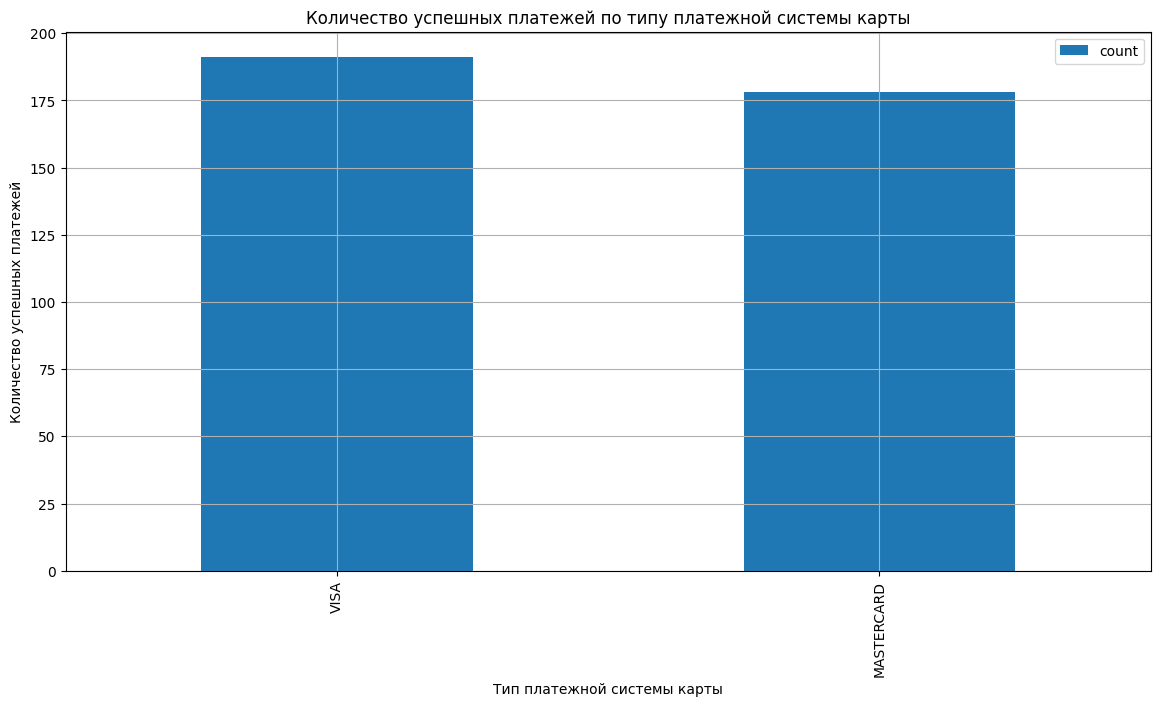

In [27]:
(df_successful_payments.groupby('cardType').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Тип платежной системы карты',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей по типу платежной системы карты'));

In [28]:
# определим функцию для построения таблицы конверсий для каждого признака
def create_conversions_table(df, df_successful_payments, column_name):
    df_total_counts_payments = df.groupby(column_name).agg(total_payments=('transactionId', 'count')).reset_index()
    df_conversions_of_successful_payments =\
        df_successful_payments.groupby(column_name).agg(count=('transactionId', 'count')).reset_index()
    
    df_conversions_of_successful_payments =\
        (df_conversions_of_successful_payments.merge(right=df_total_counts_payments, how='left', on=column_name)
         .assign(conversion=lambda x : x['count'] / x['total_payments'] * 100).sort_values(by='conversion', ascending=False))
    
    return df_conversions_of_successful_payments

In [29]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'cardType')
df_conversions_of_successful_payments

,cardType,count,total_payments,conversion
0,MASTERCARD,178,542,32.841328
1,VISA,191,659,28.983308


**Выводы**

Из графика и конверсий платежей, по каждому типу платежной системы, видно, что от типа платежной системы карты, существенно не зависит успешность платежа, но лучший тип платежной системы карты является `MASTERCARD`.

**18. Посмотрим, сколько успешных платежей у каждого поставщика платежных услуг.**

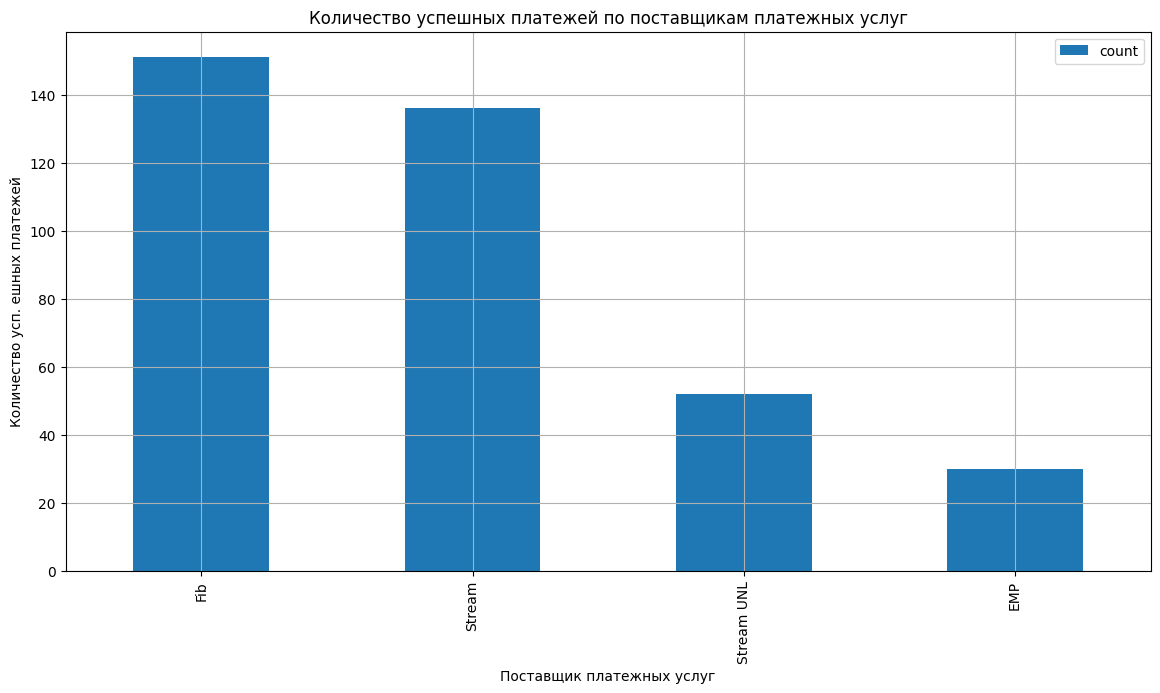

In [30]:
(df_successful_payments.groupby('payment service provider').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Поставщик платежных услуг',
          ylabel='Количество усп. ешных платежей',
          title='Количество успешных платежей по поставщикам платежных услуг'));

In [31]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'payment service provider')
df_conversions_of_successful_payments

,payment service provider,count,total_payments,conversion
0,EMP,30,77,38.961039
1,Fib,151,467,32.334047
2,Stream,136,442,30.769231
3,Stream UNL,52,215,24.186047


**Выводы**

Из конверсий платежей однозначно следует, что лучший поставщик платежных услуг: `EMP` c конверсией - **38.961038961038966 %**.

**19. Посмотрим, сколько успешных платежей у каждой страны.**

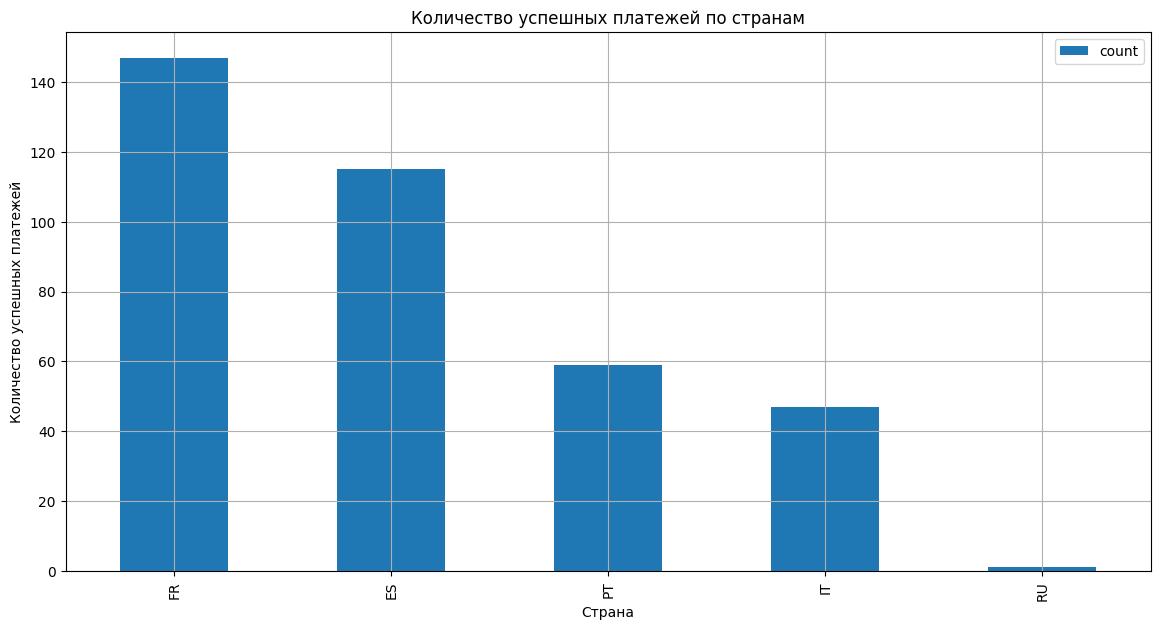

In [32]:
(df_successful_payments.groupby('country').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Страна',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей по странам'));

In [33]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'country')
df_conversions_of_successful_payments

,country,count,total_payments,conversion
4,RU,1,2,50.000000
1,FR,147,371,39.622642
2,IT,47,127,37.007874
3,PT,59,162,36.419753
0,ES,115,536,21.455224


**Выводы**

Из конверсий платежей однозначно следует, что наиболее успешные платежи из страны: `RU`.
Следует обратить внимание, что по стране `RU` слишком мало данных о платежах, всего две записи, чтобы делать выводы. Для более точного исследования, необходимо больше данных по платежам из страны `RU`. В рамках данного исследования, без дополнительных данных, лучше выбрать страну с лучшей конверсией платежей, у которой больше данных: `FR` с конверсией - **39.62264150943396 %**.

**20. Посмотрим, сколько успешных платежей в зависимости от продавца.**

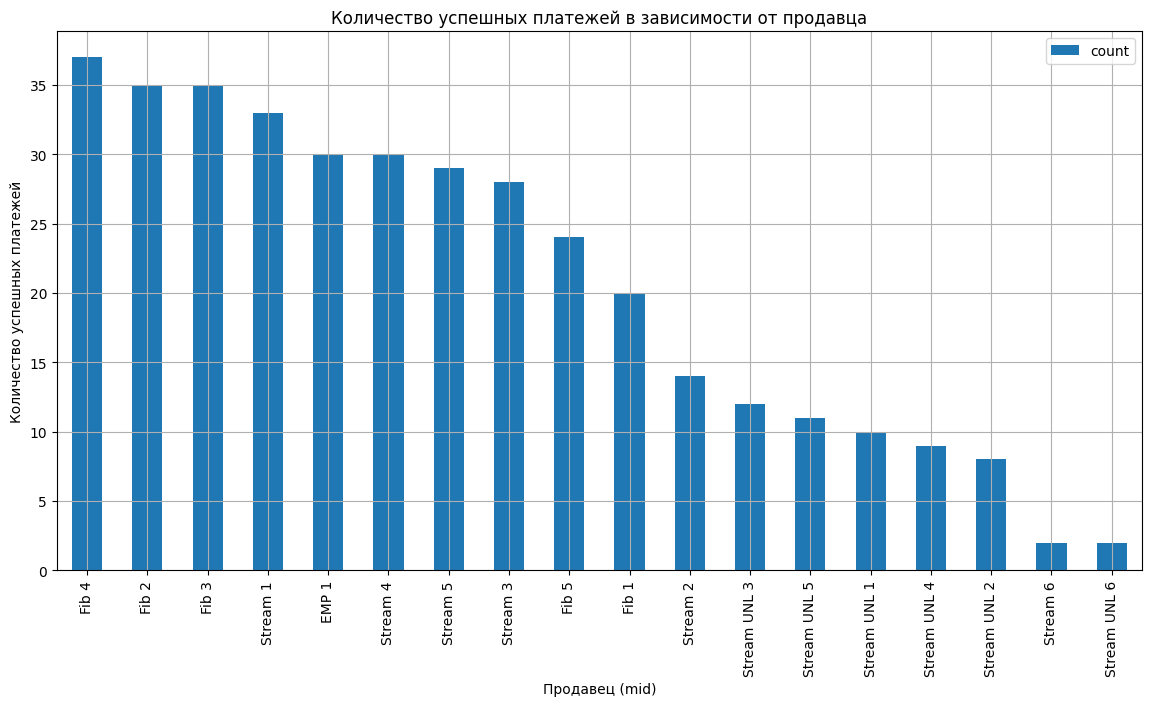

In [34]:
(df_successful_payments.groupby('merchantName').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Продавец (mid)',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от продавца'));

In [35]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'merchantName')
df_conversions_of_successful_payments

,merchantName,count,total_payments,conversion
17,Stream UNL 6,2,4,50.000000
11,Stream 6,2,4,50.000000
0,EMP 1,30,77,38.961039
8,Stream 3,28,74,37.837838
3,Fib 3,35,95,36.842105
2,Fib 2,35,107,32.710280
5,Fib 5,24,75,32.000000
4,Fib 4,37,117,31.623932
9,Stream 4,30,99,30.303030
6,Stream 1,33,110,30.000000


**Выводы**

Из конверсий платежей однозначно следует, что наиболее успешные платежи с продавцами: `Stream UNL 6` и `Stream 6`.

Следует обратить внимание, что по платежам с продавцами `Stream UNL 6` и `Stream 6` слишком мало данных, всего по четыре записи, чтобы делать выводы. Для более точного исследования, необходимо больше данных по платежам с продавцами `Stream UNL 6` и `Stream 6`. В рамках данного исследования, без дополнительных данных, лучше выбрать продавца с лучшей конверсией платежей, у которого больше данных: `EMP 1` - с конверсией **38.961039 %**.

**21. Посмотрим, сколько успешных платежей в зависимости от типа карты.**

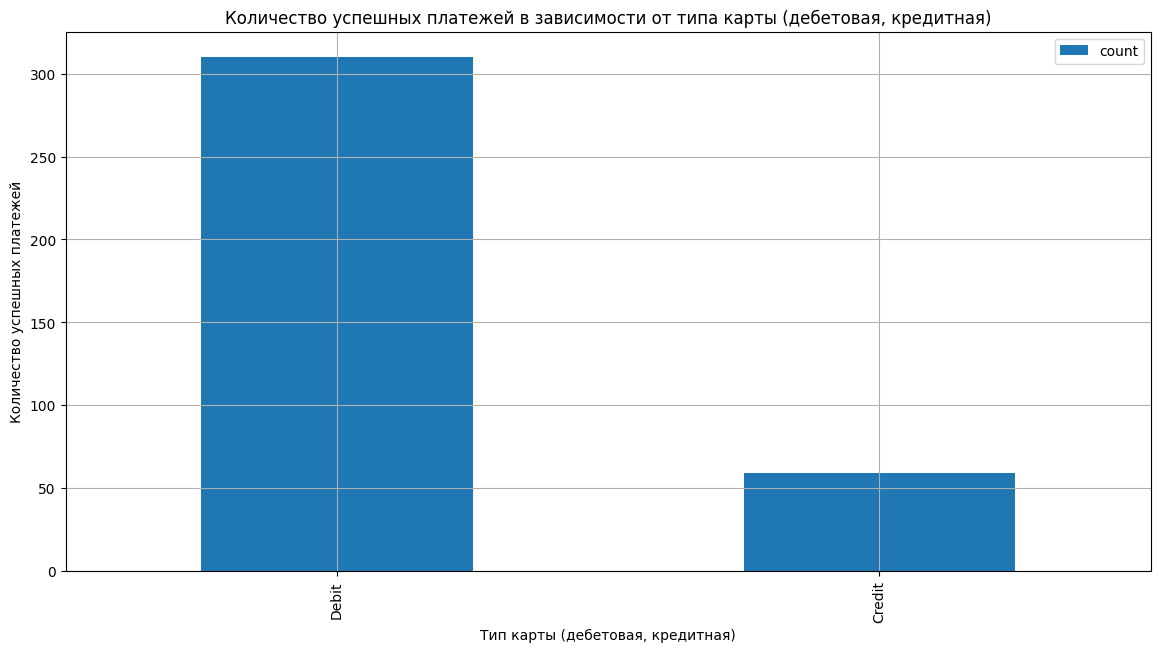

In [36]:
(df_successful_payments.groupby('creditDebit').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Тип карты (дебетовая, кредитная)',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от типа карты (дебетовая, кредитная)'));

In [37]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'creditDebit')
df_conversions_of_successful_payments

,creditDebit,count,total_payments,conversion
0,Credit,59,154,38.311688
1,Debit,310,1047,29.608405


**Выводы**

Из конверсий платежей однозначно следует, что наиболее успешные платежи выполняются с кредитных карт (конверсия - **38.311688 %**).

**22. Посмотрим, какое количество успешных платежей в зависимости от BIN карты.**

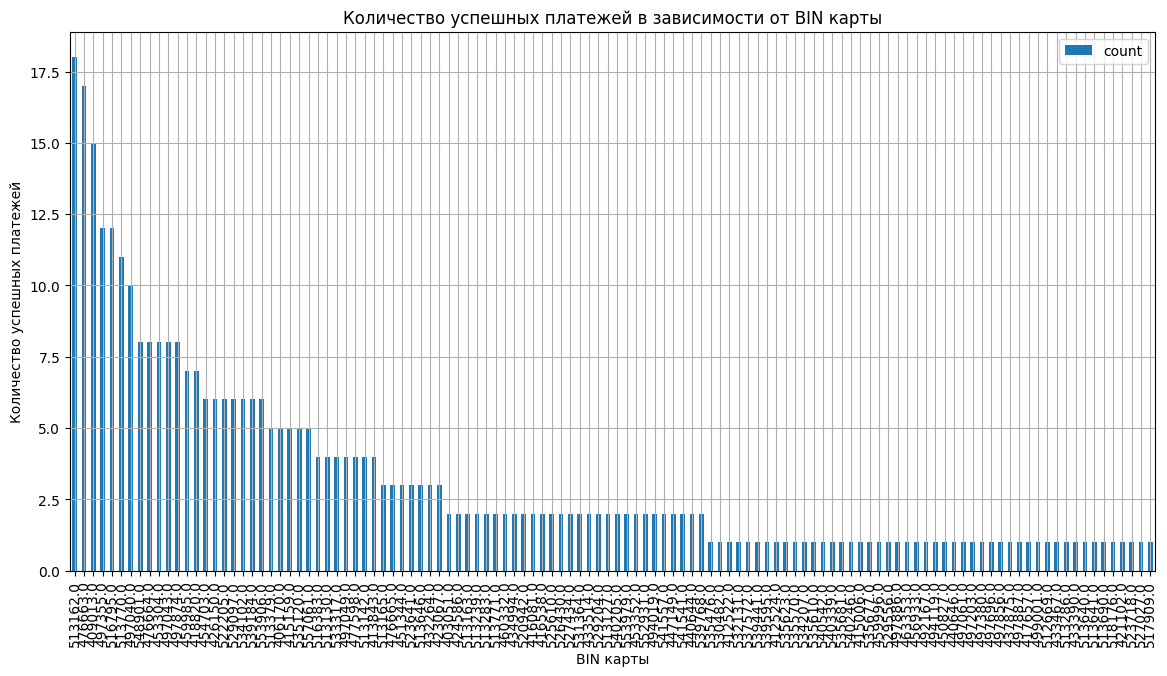

In [38]:
(df_successful_payments.groupby('cardBin').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='BIN карты',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от BIN карты'));

In [39]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'cardBin')
df_conversions_of_successful_payments.head(50)

,cardBin,count,total_payments,conversion
58,513142.0,4,4,100.000000
41,494119.0,1,1,100.000000
22,440644.0,2,2,100.000000
23,440646.0,1,1,100.000000
24,447149.0,2,2,100.000000
48,497380.0,1,1,100.000000
96,535610.0,1,1,100.000000
95,535570.0,1,1,100.000000
89,532131.0,1,1,100.000000
67,513641.0,1,1,100.000000


**Выводы**

Из конверсий платежей однозначно следует, что наиболее успешные платежи выполняются с первых 39 банковских карт, с определенными BIN, которые указаны в таблице выше (конверсия - **100%**). Необходимо учитывать, что по ним мало данных и лучше использовать банковские карты, с определенными BIN, с меньшей конверсией, но с более точной (рассчитана на достаточном наборе данных).

**23. Посмотрим, какое количество успешных платежей в зависимости от типа карты (предоплаченая карта или нет).**

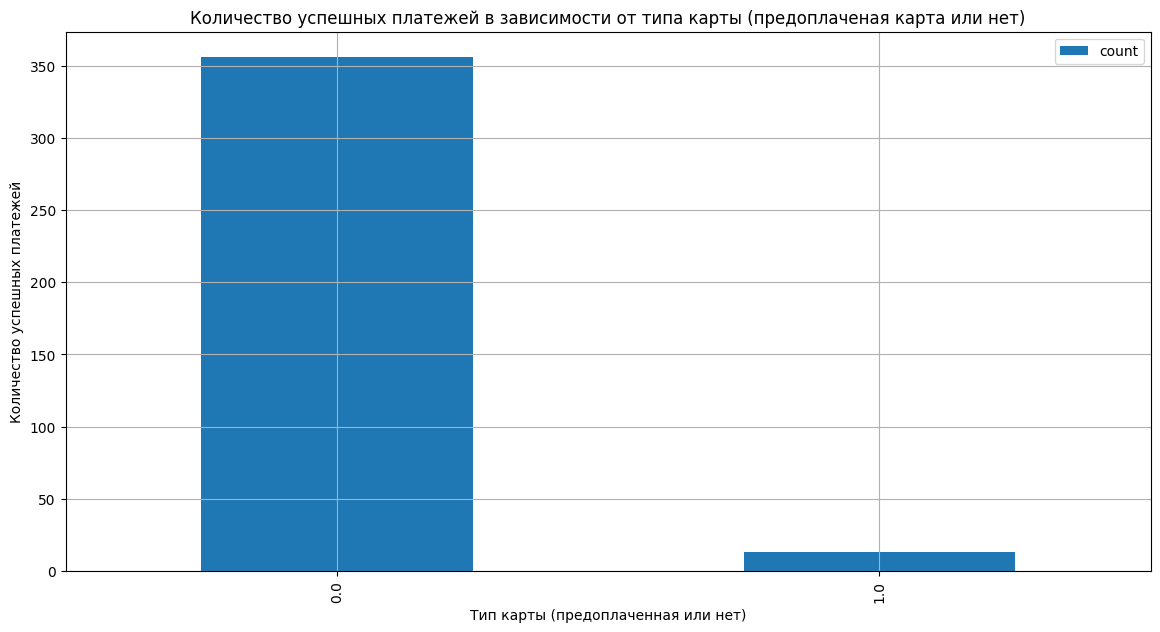

In [40]:
(df_successful_payments.groupby('cardIsPrepaid').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Тип карты (предоплаченная или нет)',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от типа карты (предоплаченая карта или нет)'));

In [41]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'cardIsPrepaid')
df_conversions_of_successful_payments

,cardIsPrepaid,count,total_payments,conversion
0,0.0,356,1130,31.504425
1,1.0,13,71,18.309859


**Выводы**

Из конверсий платежей однозначно следует, что наиболее успешные платежи выполняются с не предоплаченных карт (конверсия - **31.504425 %**).

**24. Посмотрим, какое количество успешных платежей в зависимости от значения признака `custom3`.**

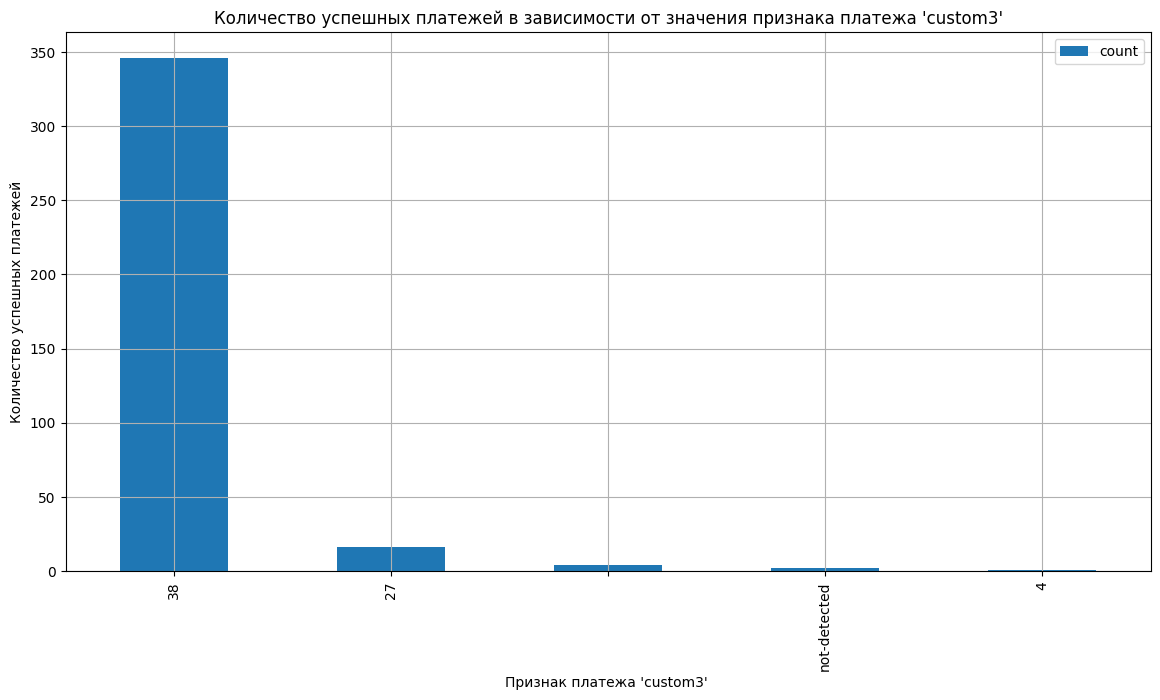

In [42]:
(df_successful_payments.groupby('custom3').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Признак платежа \'custom3\' ',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от значения признака платежа \'custom3\''));

In [43]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'custom3')
df_conversions_of_successful_payments

,custom3,count,total_payments,conversion
1,27,16,24,66.666667
0,,4,8,50.000000
3,4,1,2,50.000000
2,38,346,1154,29.982669
4,not-detected,2,13,15.384615


**Выводы**

Из конверсий платежей однозначно следует, что наиболее успешные платежи выполняются с признаком `custom3` **= 27** (конверсия - **66.666667 %**).

**25. Посмотрим, какое количество успешных платежей в зависимости от значения признака `product1 name`.**

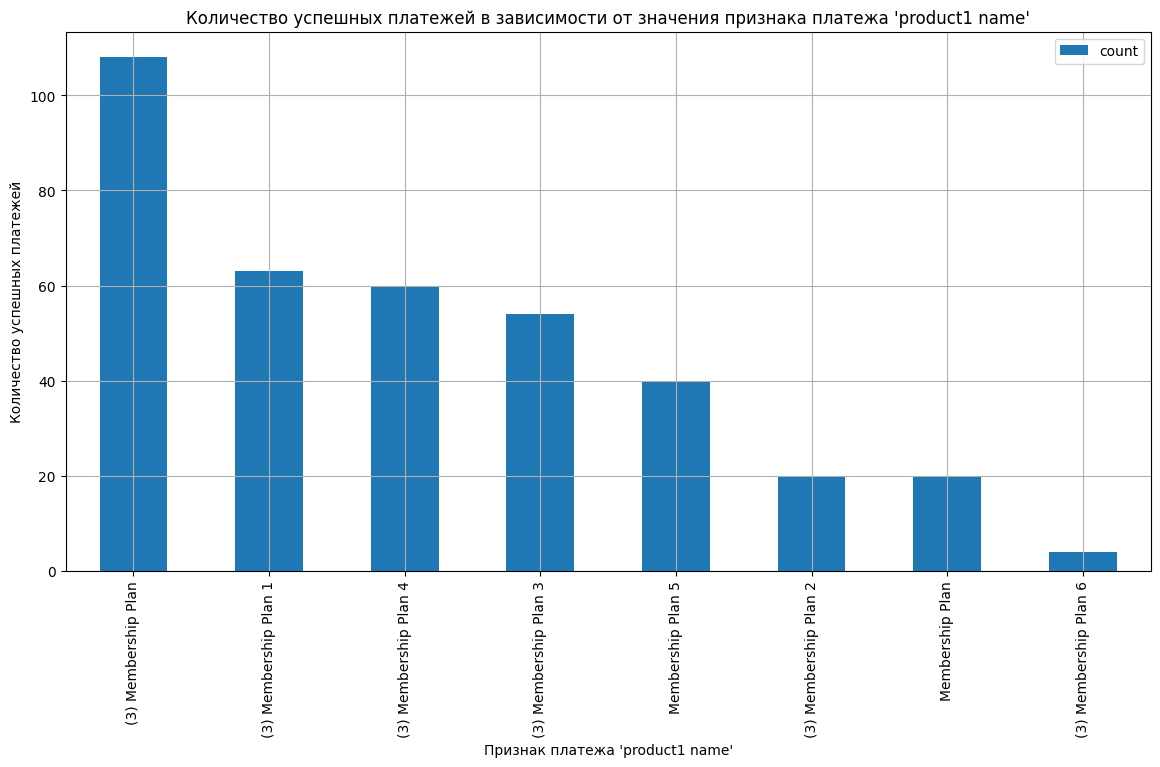

In [44]:
(df_successful_payments.groupby('product1 name').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Признак платежа \'product1 name\'',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от значения признака платежа \'product1 name\''));

In [45]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'product1 name')
df_conversions_of_successful_payments

,product1 name,count,total_payments,conversion
5,(3) Membership Plan 6,4,10,40.000000
3,(3) Membership Plan 3,54,153,35.294118
6,Membership Plan,20,59,33.898305
0,(3) Membership Plan,108,326,33.128834
4,(3) Membership Plan 4,60,195,30.769231
1,(3) Membership Plan 1,63,227,27.753304
2,(3) Membership Plan 2,20,74,27.027027
7,Membership Plan 5,40,157,25.477707


**Выводы**

Из конверсий платежей однозначно следует, что наиболее успешные платежи выполняются с признаком `product1 name` **= (3) Membership Plan 6** (конверсия - **40%**).

**26. Посмотрим, какое количество успешных платежей в зависимости от значения признака `product1 price`.**

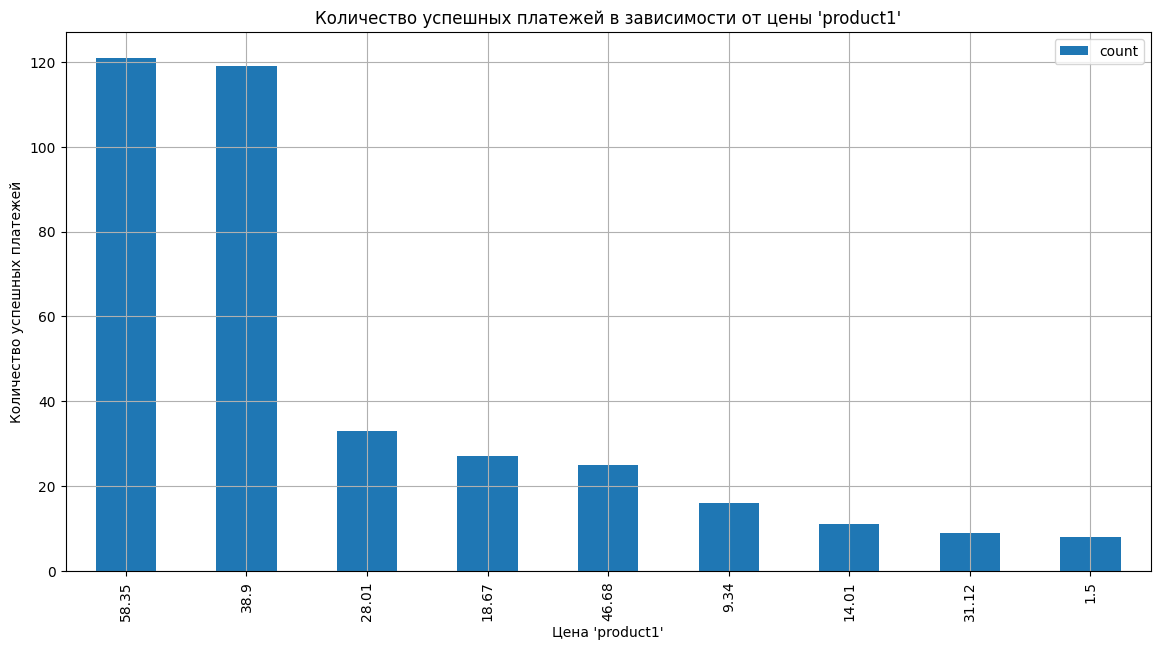

In [46]:
(df_successful_payments.groupby('product1 price').agg(count=('transactionId', 'count'))
    .sort_values(by='count', ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(14,7), 
          xlabel='Цена \'product1\'',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от цены \'product1\''));

In [47]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'product1 price')
df_conversions_of_successful_payments

,product1 price,count,total_payments,conversion
0,1.50,8,11,72.727273
8,58.35,121,207,58.454106
6,38.90,119,243,48.971193
4,28.01,33,97,34.020619
7,46.68,25,107,23.364486
3,18.67,27,167,16.167665
2,14.01,11,74,14.864865
1,9.34,16,169,9.467456
5,31.12,9,126,7.142857


**Выводы**

Из конверсий платежей однозначно следует, что наиболее успешные платежи выполняются с признаком `product1 price` **= 58.35** (конверсия - **58.454106%**). 

Значение признака **=1.50%** во внимание не берем, хотя у него конверсия **72.727273%**, так как по нему мало данных, по которым сложно корректно установить подлинную конверсию.

Хотя из анализа таблицы `df_conversions_of_successful_payments` явно видно, что есть линейная и нелинейная зависимость между стоимостью продукта и конверсией. но это все-таки не является одним из ключевых факторов влияющих на успешность платежа. По этой причине, данный признак, в результате исследования, участвовать не будет.

**27. Построим график зависимости - количество успешных платежей в зависимости от дня месяца.**

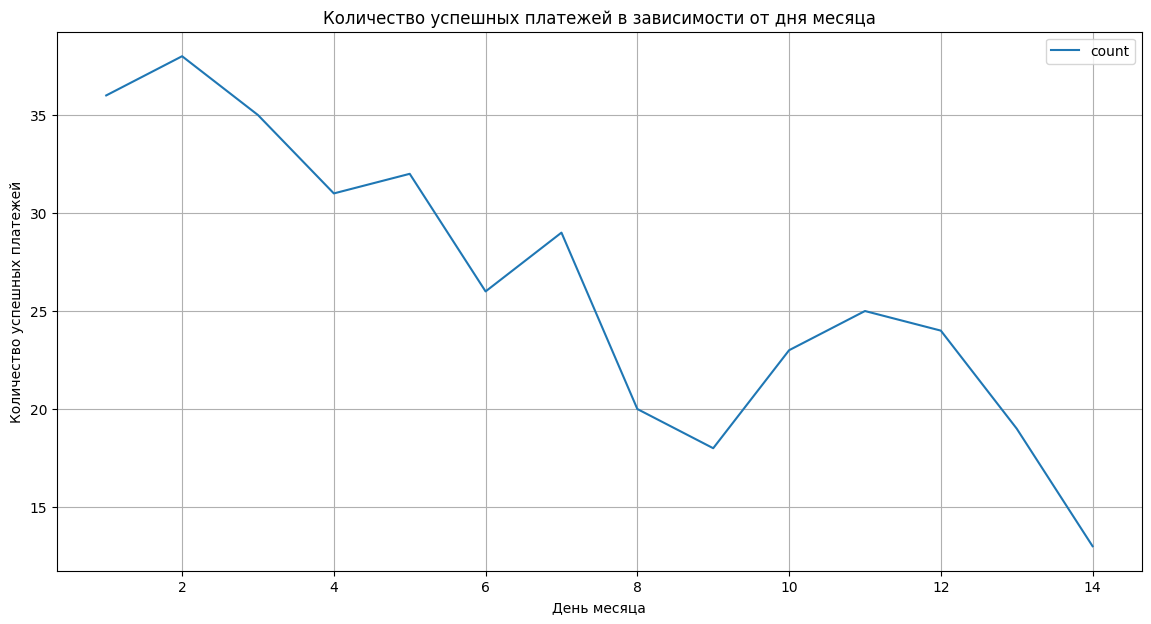

In [48]:
(df_successful_payments.groupby('day').agg(count=('transactionId', 'count'))
    .plot(grid=True,
          legend=True,
          figsize=(14, 7),
          xlabel='День месяца',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от дня месяца'));

In [49]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'day')
df_conversions_of_successful_payments

,day,count,total_payments,conversion
0,1,36,93,38.709677
1,2,38,106,35.849057
6,7,29,84,34.523810
3,4,31,90,34.444444
9,10,23,67,34.328358
10,11,25,74,33.783784
7,8,20,62,32.258065
12,13,19,60,31.666667
11,12,24,76,31.578947
4,5,32,104,30.769231


**28. Построим график зависимости - количество успешных платежей в зависимости от часа дня.**

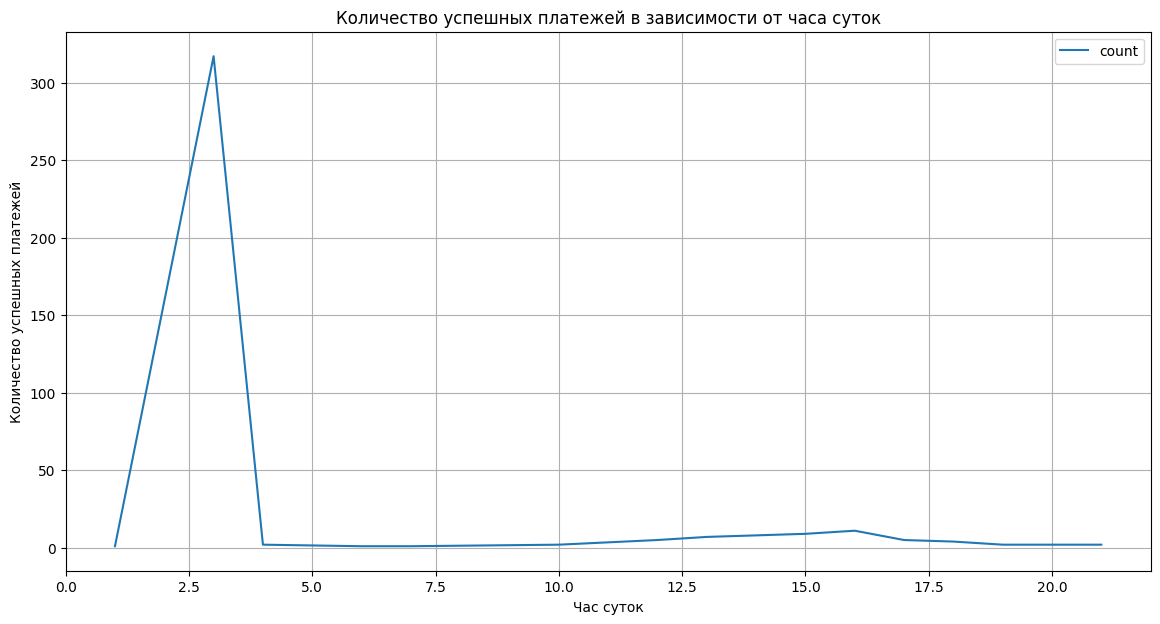

In [50]:
(df_successful_payments.groupby('hour').agg(count=('transactionId', 'count'))
    .plot(grid=True,
          legend=True,
          figsize=(14, 7),
          xlabel='Час суток',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от часа суток'));

In [51]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'hour')
df_conversions_of_successful_payments

,hour,count,total_payments,conversion
0,1,1,1,100.000000
2,4,2,2,100.000000
3,6,1,1,100.000000
4,7,1,1,100.000000
6,12,5,5,100.000000
7,13,7,7,100.000000
9,16,11,11,100.000000
10,17,5,5,100.000000
11,18,4,4,100.000000
12,19,2,2,100.000000


**29. Построим график зависимости - количество успешных платежей в зависимости от минут.**

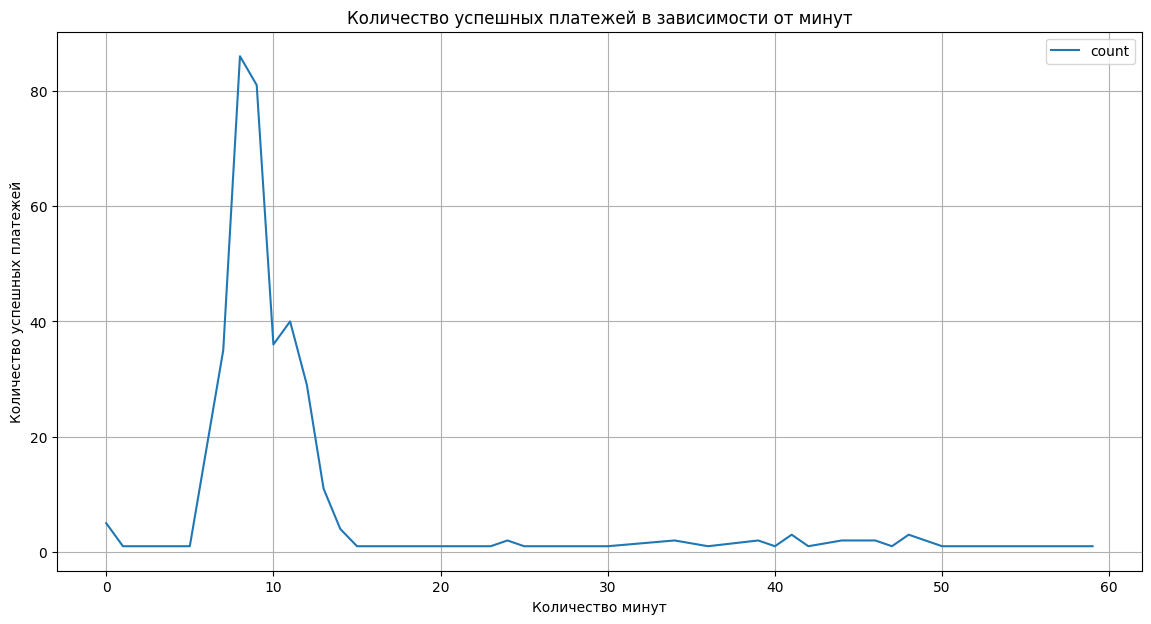

In [52]:
(df_successful_payments.groupby('minute').agg(count=('transactionId', 'count'))
    .plot(grid=True,
          legend=True,
          figsize=(14, 7),
          xlabel='Количество минут',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от минут'));

In [53]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'minute')
df_conversions_of_successful_payments

,minute,count,total_payments,conversion
0,0,5,5,100.000000
1,1,1,1,100.000000
22,34,2,2,100.000000
23,36,1,1,100.000000
24,39,2,2,100.000000
25,40,1,1,100.000000
26,41,3,3,100.000000
27,42,1,1,100.000000
28,44,2,2,100.000000
29,45,2,2,100.000000


**30. Построим график зависимости - количество успешных платежей в зависимости от минут.**

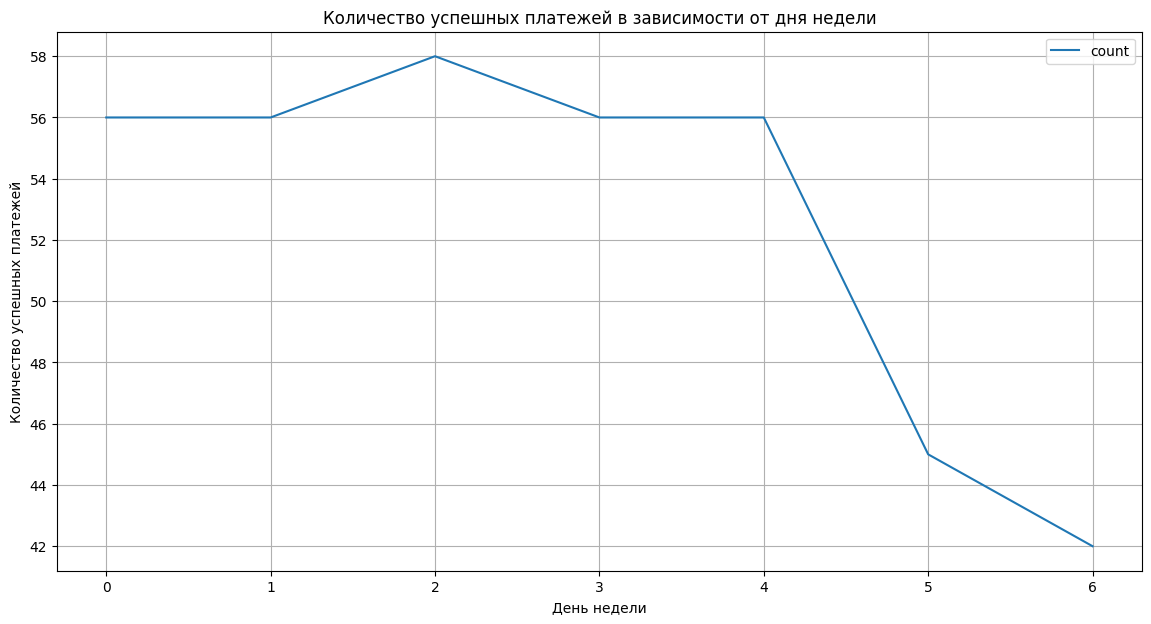

In [54]:
(df_successful_payments.groupby('weekday').agg(count=('transactionId', 'count'))
    .plot(grid=True,
          legend=True,
          figsize=(14, 7),
          xlabel='День недели',
          ylabel='Количество успешных платежей',
          title='Количество успешных платежей в зависимости от дня недели'));

In [55]:
df_conversions_of_successful_payments = create_conversions_table(df, df_successful_payments, 'weekday')
df_conversions_of_successful_payments

,weekday,count,total_payments,conversion
0,0,56,155,36.129032
3,3,56,164,34.146341
1,1,56,177,31.638418
4,4,56,180,31.111111
2,2,58,209,27.751196
5,5,45,163,27.607362
6,6,42,153,27.450980


## Итоги исследования

*1. Закономерности определяющие успешность платежа:*
   - поставщик платежных услуг;
   - страна платежа (страна из которой выполняется платеж);
   - продавец, которому делается платеж (оплачивается продукт);
   - тип карты (дебетовая, кредитная);
   - BIN карты;
   - тип карты (предоплаченная или нет);
   - значение признака `custom3`;
   - значения признака `product1 name`;
   - день недели, в который выполняется платеж;
   - время (измеряется в часах), в которое выполняется платеж.
    
*2. Варианты увеличения прохождения платежей.*

   а) Первый вариант (наиболее эффективный, из анализа представленных данных):
   - выбрать поставщика платежных услуг c лучшей конверсией - **38.961038961038966 %** : **`EMP`**;
   - выполнять платеж из страны с лучшей конверсией - **39.62264150943396 %** : **`FR`**;
   - выбрать продавца, у которого покупается продукт, с лучщей конверсией - **38.961039 %** : **`EMP 1`**;
   - выбрать для оплаты кредитную карту, конверсия - **38.311688 %**;
   - выбрать для оплаты карту с BIN, с лучшей конверсией - **70-100 %**, из первых 40 банковских карт, из списка в таблице, которая создана на шаге 22;
   - выбрать для оплаты не предоплаченную карту, по ним конверсия - **31.504425 %**;
   - при возможности, выбрать значение признака `custom3` с лучшей конверсией - **66.666667 %** : **`27`**;
   - при возможности, выбрать значение признака `product1 name` с лучшей конверсией - **40 %** : **`(3) Membership Plan 6`**;
   - выполнять платеж в день недели с лучшей конверсией - **36.129032 %** : **`понедельник`**;
   - избегать выполнения платежа в определенное время суток: 3 часа и 10 часов утра (саммая низкая конверсия).
     
   б) Иные варианты:
    - различные вариации признаков из подпункта "а".
        
*Рекомендации по улучшению исследования и вариантов улучшения платежей*:
   - собрать большой массив исходных данных, за более продолжительный период времени, для более полного исследования.анализа